<ipython-input-2-0f86263c370f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_activity.index, y=monthly_activity.values, palette='viridis')


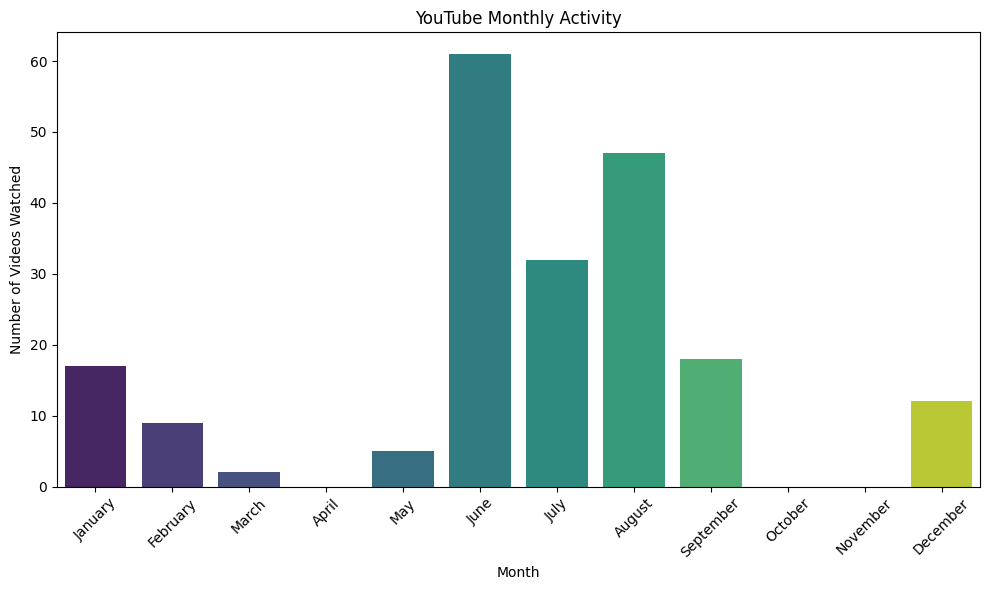

<ipython-input-2-0f86263c370f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_activity.index, y=weekly_activity.values, palette='coolwarm')


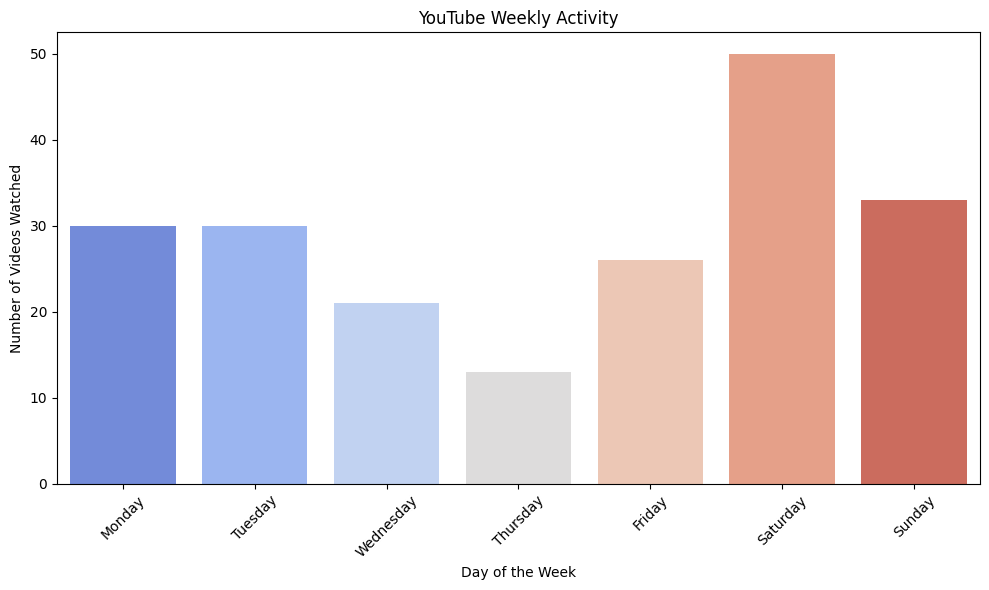

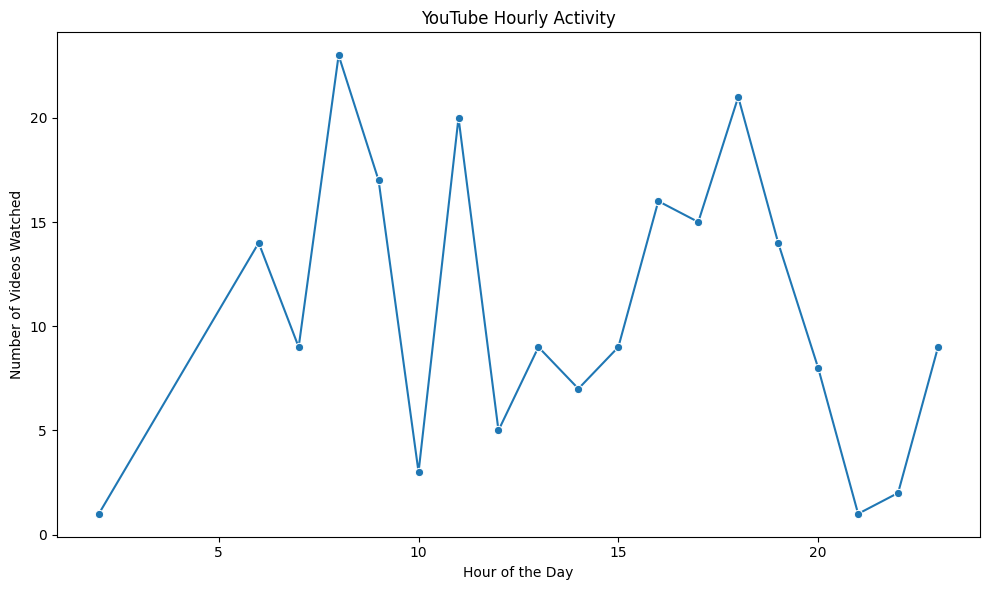

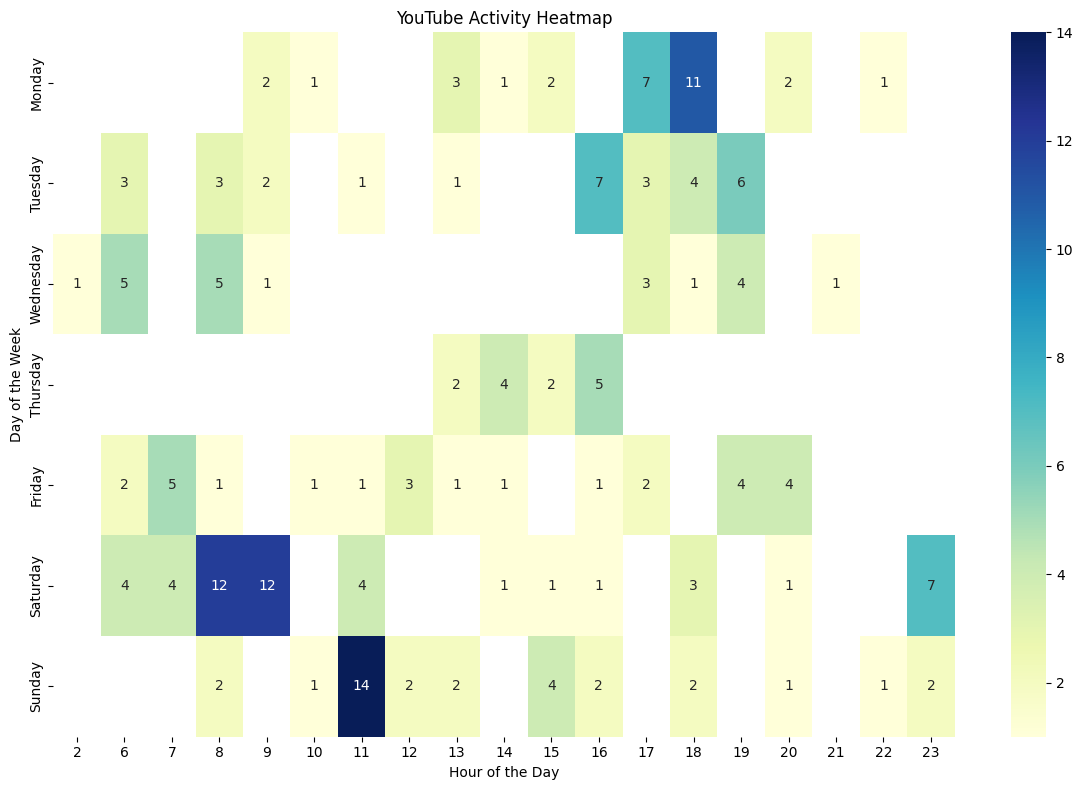

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the JSON file
file_path = '/content/watch-history.json'  # Update the file path if necessary
data = pd.read_json(file_path)

# Extract relevant columns and process data
df = pd.DataFrame(data)
df = df[['header', 'title', 'time']]  # Keep relevant columns
df['time'] = pd.to_datetime(df['time'])  # Convert time to datetime
df['date'] = df['time'].dt.date  # Extract date
df['hour'] = df['time'].dt.hour  # Extract hour
df['day_of_week'] = df['time'].dt.day_name()  # Day of the week
df['month'] = df['time'].dt.month_name()  # Month name

# Monthly activity
monthly_activity = df.groupby('month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Weekly activity
weekly_activity = df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly activity
hourly_activity = df.groupby('hour').size()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_activity.index, y=monthly_activity.values, palette='viridis')
plt.title('YouTube Monthly Activity')
plt.xlabel('Month')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_activity.index, y=weekly_activity.values, palette='coolwarm')
plt.title('YouTube Weekly Activity')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_activity.index, y=hourly_activity.values, marker='o')
plt.title('YouTube Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()

# Heatmap of activity
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack().reindex(index=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('YouTube Activity Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

# Save cleaned data for reference
df.to_csv('cleaned_watch_history.csv', index=False)
